In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

---

In [24]:
#Load all 4 data files and concatenate them
dataframes = []
for i in range(4):
    file =  pd.read_csv(f'data/UNSW-NB15_{i+1}.csv', delimiter = ",", header=None)
    dataframes.append(file)
data = pd.concat(dataframes)

### Evaluating Data

---

In [53]:
#Rename columns
data.columns = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

In [54]:
len(data) #Number of data samples

440044

In [55]:
pd.unique(data['Label']) #Double check classes/categories in data

array([0, 1], dtype=int64)

In [56]:
#Check which columns have missing values
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()

if len(columns_with_nan) != 0:
    print('Amount of null values in columns:')
    for col in columns_with_nan:
        print(f'\t{col}: {data[col].isna().sum()}')
else:
    print('No missing values in data')

Amount of null values in columns:
	ct_flw_http_mthd: 406484
	is_ftp_login: 433412
	attack_cat: 351150


### The dataset creators filled in 'NaN' under the feature 'attack_cat' for benign traffic since an attack category does not apply to normal traffic. This is not truly missing data and should be replaced with a 0 value to correspond to the benign class label.

Reference: *'DEEP-INTRUSION DETECTION SYSTEM WITH ENHANCED UNSW-NB15 DATASET BASED ON DEEP LEARNING TECHNIQUES', A.M. ALEESA, MOHAMMED YOUNIS, AHMED A. MOHAMMED, NAN M. SAHAR*


In [57]:
#Replace NaN with 0 for benign traffic attack category
data['attack_cat'] = data['attack_cat'].fillna(0)

In [61]:
#Verify that the previous code worked...
    #attack_cat column should no longer have NaN values (all traffic is either benign with a 0 value or an attack w the corresponding label)
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()

if len(columns_with_nan) != 0:
    print('Amount of null values in columns:')
    for col in columns_with_nan:
        print(f'\t{col}: {data[col].isna().sum()}')
else:
    print('No missing values in data')

Amount of null values in columns:
	ct_flw_http_mthd: 406484
	is_ftp_login: 433412


In [59]:
#Check types and amounts of values of the first column with missing data
print(pd.unique(data['ct_flw_http_mthd']))
print(pd.value_counts(data['ct_flw_http_mthd'], dropna=False))

[nan  1.  4.  9.  2.  6.]
NaN    406484
1.0     32314
4.0      1084
2.0       102
9.0        54
6.0         6
Name: ct_flw_http_mthd, dtype: int64


In [60]:
#Check types and amounts of values of the second column with missing data
print(pd.unique(data['is_ftp_login']))
print(pd.value_counts(data['is_ftp_login'], dropna=False))

[nan  1.  4.  2.]
NaN    433412
1.0      6578
4.0        40
2.0        14
Name: is_ftp_login, dtype: int64


In [11]:
#Remove NaN values anywhere they appear in dataset
data = data.dropna(axis=0, how='any')

In [13]:
#Ensure that label column still has both classes
pd.unique(data['Label'])

array([0, 1], dtype=int64)

In [14]:
#Ensure no more missing data
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()

if len(columns_with_nan) != 0:
    print('Amount of null values in columns:')
    for col in columns_with_nan:
        print(f'\t{col}: {data[col].isna().sum()}')
else:
    print('No missing values in data')

No missing values in data


In [15]:
len(data) #Num of samples remaining

1087203

In [16]:
#Remove data that is not benign and not a DoS attack
data = data.drop(data[(data['attack_cat'] != 'DoS') & (data['attack_cat'] != 0)].index)

In [17]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,0,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,0,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,0,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,0,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387197,59.166.0.6,8647,149.171.126.8,25,tcp,CON,0.308446,31366,2566,31,...,0,1,1,2,1,1,1,1,0,0
387198,59.166.0.2,4681,149.171.126.1,5190,tcp,FIN,0.006390,2054,2478,31,...,0,2,4,1,3,1,1,1,0,0
387199,59.166.0.2,47560,149.171.126.2,6125,tcp,FIN,0.222470,8928,320,31,...,0,3,3,2,3,1,1,2,0,0
387200,59.166.0.3,11047,149.171.126.5,80,tcp,CON,0.004158,890,8896,31,...,0,1,1,2,2,1,1,2,0,0


In [18]:
pd.unique(data['attack_cat']) #Verify attack category remaining - benign and DoS

array([0, 'DoS'], dtype=object)

In [19]:
print('Amount of data per attack category type:')
print(pd.value_counts(data['attack_cat']))

Amount of data per attack category type:
0      1043940
DoS       1167
Name: attack_cat, dtype: int64


### Pie Chart for Class Balance

---

In [21]:
#Prepare data for pie chart
class_counts = data['Label'].value_counts()
class_counts

0    1043940
1       1167
Name: Label, dtype: int64

Text(0.5, 1.05, 'Class Balance')

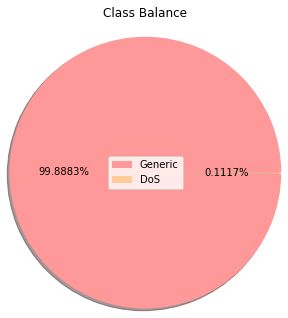

In [22]:
colors = ['#ff9999','#ffcc99']
plt.figure(figsize=(5, 5))
plt.pie(class_counts, autopct='%1.4f%%', radius=1.25, colors=colors, shadow=True)
plt.legend(labels=['Generic', 'DoS'], loc='center')
plt.title('Class Balance', y=1.05)